Implementing Random Forest Classifier ML Algorithm on the Iris Dataset

In [3]:
#import necessary libraries
import pandas as pd #to handle dataframes
import numpy as np #for calculations on arrays
import matplotlib.pyplot as plt #for plots
import seaborn as sns #for plots

from sklearn.ensemble import RandomForestClassifier #for random forest classifier
from sklearn.model_selection import train_test_split #for splitting dataset into training and testing data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report #for evaluating model performance

In [8]:
#load dataset
df = pd.read_csv('Iris.csv')
df.drop('Id', axis=1, inplace=True) #because Id is irrelevant here
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
# Separate features and target
X = df.drop('Species', axis=1) #features
'''axis=1 refers to the column (so like drop column)
axis=0 refers to the row (so like drop row)'''
y = df['Species'] #target

#train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
#train the random forest classifier model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
'''n_estimators=100: This parameter specifies that the random forest will consist of 100 decision trees.
random_state=42: This ensures that the results are reproducible.
By setting a specific random state, the random number generator used by the algorithm is initialized with the same seed, resulting in consistent outcomes.'''
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
#make pedictions
y_pred=rf.predict(X_test)

#evaluate accuracy
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



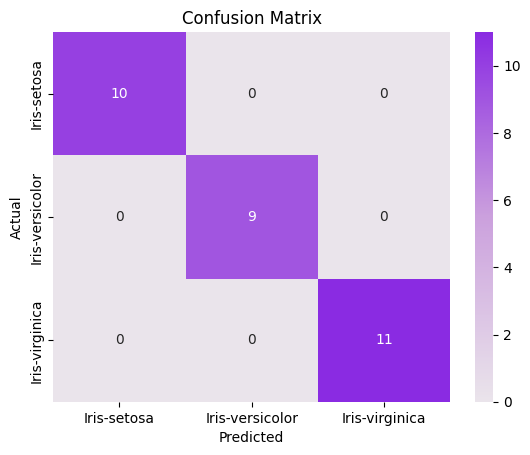

In [28]:
#confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)

from matplotlib.colors import LinearSegmentedColormap
#custom color: (I'm just a girl)
custom_cmap = LinearSegmentedColormap.from_list("pink_purple", ["#eae4eb", "#cba0dd", "#8a2be2"])

sns.heatmap(cm, annot=True, fmt='d', cmap=custom_cmap,
            xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

<ipython-input-29-cc38e549b566>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette="viridis")


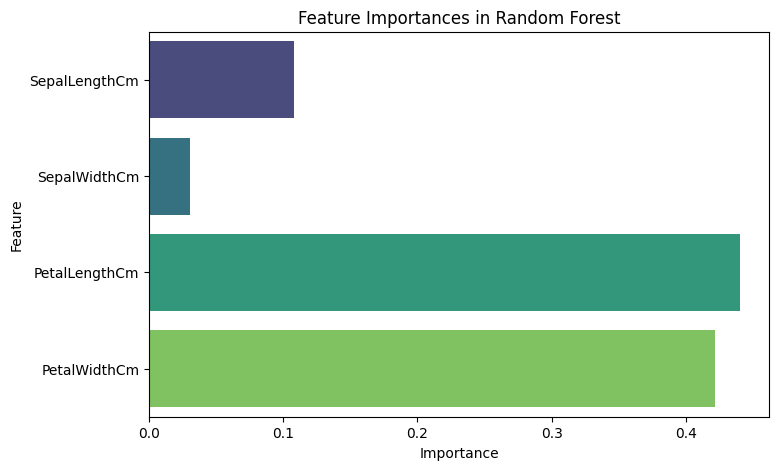

In [29]:
# Step 8: Feature Importance Plot
'''feature importance plot helps visualize the importance of each feature (Sepal Length, Sepal Width, Petal Length, Petal Width) in the Random Forest model's prediction process.
It helps us understand which features have the most influence on the model's decisions.'''

importances = rf.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=feature_names, palette="viridis")
plt.title("Feature Importances in Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()
